In [1]:
# os functions
import os

# local files
from env import host, user, password
import wrangle as w

# df manipulations
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

np.random.seed(123)

In [2]:
train, validate, test = w.wrangle_zillow()

Using cached csv


In [3]:
train.shape, validate.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))

In [4]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
10057,4.0,2.0,1561.0,248240.0,1973.0,2504.40,06059
2004970,3.0,2.0,1770.0,88390.0,1960.0,1671.93,06037
306031,2.0,1.0,1452.0,81169.0,1946.0,1310.88,06037
1038595,3.0,1.0,1000.0,119174.0,1950.0,1900.28,06037
270959,3.0,2.0,1974.0,432268.0,1988.0,5315.27,06037


In [28]:
# Let's get our columns we want to scale
# Exclude our target variable (taxamount)
features = [col for col in train.columns if col != 'tax_value']
f_to_scale = [col for col in features if train[col].dtype != 'object']
f_to_scale

['bedrooms', 'bathrooms', 'area', 'year_built', 'taxamount']

In [29]:
# Create our x and y splits of our dataframes
x_train = train[features]
y_train = train['tax_value']

x_validate = validate[features]
y_validate = validate['tax_value']

x_test = test[features]
y_test = test['tax_value']

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [30]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()

In [31]:
# Fit only to train data
scaler_minmax.fit(x_train[f_to_scale])

MinMaxScaler()

In [32]:
# Transform the x sets on the fit scaler
x_train_scaled = scaler_minmax.transform(x_train[f_to_scale])
x_validate_scaled = scaler_minmax.transform(x_validate[f_to_scale])
x_test_scaled = scaler_minmax.transform(x_test[f_to_scale])

Text(0.5, 1.0, 'Scaled')

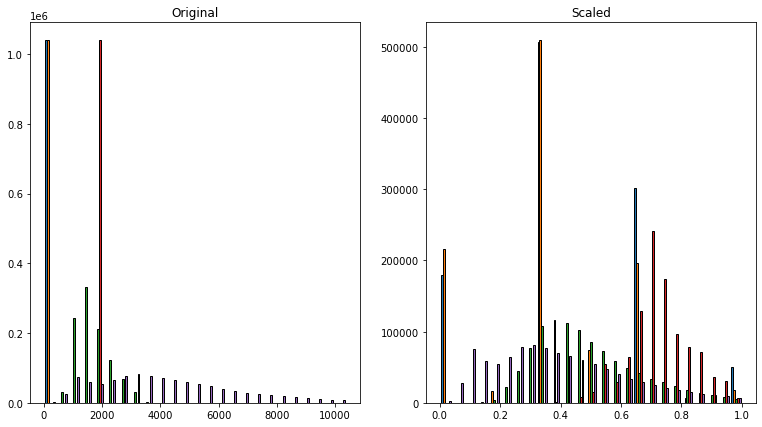

In [33]:
plt.figure(figsize=(13,7))
plt.subplot(121)
plt.hist(x_train[f_to_scale], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [ ]:
def scale_data(train, validate, test):
    # Using MinMax Scaler for data
    scaler = MinMaxScaler()
    # Isolating our columns to scale based on numeric dtype 
    num_cols = train.select_dtypes('number').columns
    
    # Fit and transform 